## Webscraping GoFundMe 

#### Use selenium library to scrape data from GoFundMe in the categories: "Creativity" "Education" "Environment" "NonProfit" "Family" in a local area nearby 

The data that will be extracted includes Campaign title, Category, Current funding amount, and Funding goal. Data scraping is used for learning purposes only and the names of the campaign makers will not be extracted. Once the data is extracted into a Python list, the list will be converted into a Pandas DataFrame for Exploratory Data Analysis (EDA). The main focus is on which category receives the most funding/success on this website depending on user's location.

In [5]:
#import the necessary libraries:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import time
import selenium

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver import ActionChains, Keys
import time

In [4]:
options = Options()
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

fundme_campaigns = [] #list to store campaign information

#the url page in question:
url_page = "https://www.gofundme.com/s?location-lat=40.57870&location-lng=-74.22920&location-description=Carteret&c=13&c=17&c=342&c=8&c=4"

options.add_argument("--headless=new")
driver = webdriver.Chrome(options=options)
driver.get(url_page)
wait = WebDriverWait(driver, 30)  # Wait up to 10 seconds for all elements in the website to load

counter = 48 #start at 48 elements, increment it till it hits 1000

for i in range(1000):


    if i == counter:
        
        counter+=48
        time.sleep(5)
        load_more = driver.find_element(By.CSS_SELECTOR, "div.hrt-disp-flex.hrt-justify-center.state-results_buttonWrapper__8XS__")
        load_more.click()
        time.sleep(5)

    else:

        time.sleep(5)
        elements = driver.find_elements(By.CSS_SELECTOR, "div.full-state-list-card_mediaCardImage__edpE8")
        driver.execute_script("arguments[0].scrollIntoView();", elements[i])
        time.sleep(5)
        elements[i].click()
        time.sleep(5)
    
        campaign_title = driver.find_element(By.CSS_SELECTOR, "header.p-campaign-header")
        funds = driver.find_element(By.CSS_SELECTOR, "div.progress-meter_progressMeter__BYOlt")
        #summary = driver.find_element(By.CSS_SELECTOR, "div.campaign-description_campaignDescription__6P_RU")
        category = driver.find_element(By.CSS_SELECTOR, "a.hrt-disp-flex.hrt-align-center.hrt-link.hrt-link--gray-dark")

        fundme_campaigns.append([campaign_title.text,funds.text,category.text])

        driver.back()
        time.sleep(5)
    
print(fundme_campaigns)
print("Number of elements found: ", len(elements))

driver.close()


ElementClickInterceptedException: Message: element click intercepted: Element <div class="full-state-list-card_mediaCardImage__edpE8" style="background-image: url(&quot;https://d2g8igdw686xgo.cloudfront.net/80277131_1716390483883224_r.jpeg&quot;);"></div> is not clickable at point (179, 659). Other element would receive the click: <div id="transcend-consent-manager" style="position: fixed; z-index: 2147483647;"></div>
  (Session info: chrome=126.0.6478.127)
Stacktrace:
	GetHandleVerifier [0x00007FF7C499EEA2+31554]
	(No symbol) [0x00007FF7C4917ED9]
	(No symbol) [0x00007FF7C47D872A]
	(No symbol) [0x00007FF7C483012E]
	(No symbol) [0x00007FF7C482DAF2]
	(No symbol) [0x00007FF7C482AF8B]
	(No symbol) [0x00007FF7C482A156]
	(No symbol) [0x00007FF7C481C151]
	(No symbol) [0x00007FF7C484D02A]
	(No symbol) [0x00007FF7C481BA76]
	(No symbol) [0x00007FF7C484D240]
	(No symbol) [0x00007FF7C486C977]
	(No symbol) [0x00007FF7C484CDD3]
	(No symbol) [0x00007FF7C481A33B]
	(No symbol) [0x00007FF7C481AED1]
	GetHandleVerifier [0x00007FF7C4CA8B1D+3217341]
	GetHandleVerifier [0x00007FF7C4CF5AE3+3532675]
	GetHandleVerifier [0x00007FF7C4CEB0E0+3489152]
	GetHandleVerifier [0x00007FF7C4A4E776+750614]
	(No symbol) [0x00007FF7C492375F]
	(No symbol) [0x00007FF7C491EB14]
	(No symbol) [0x00007FF7C491ECA2]
	(No symbol) [0x00007FF7C490E16F]
	BaseThreadInitThunk [0x00007FFDB8BA257D+29]
	RtlUserThreadStart [0x00007FFDBAACAF28+40]


In [5]:
print(len(fundme_campaigns)) #check how many campaigns were scraped

421


In [6]:
print(fundme_campaigns) #checking the list

[["Support Zahavi Family's Recovery from Fire", '$523,006 raised of $1,000,000 goal\n4.2K donations', 'Family'], ['Help me to get out and complete my medicine study', '$15,278 raised of $20,000 goal\n328 donations', 'Education'], ['Help Secure a Home for Family Unjustly Evicted', '$24,341 raised of $859,000 goal\n592 donations', 'Family'], ['Help Asmaa Family in Gaza Food Water And Shelter', '$53,129 raised of $100,000 goal\n2.5K donations', 'Family'], ['In Memory of Kate: Support for Her Family', '$30,495 raised of $50,000 goal\n245 donations', 'Family'], ["Support for Herman's Family in Tragic Loss", '$14,366 raised of $20,000 goal\n184 donations', 'Family'], ['Support for Deer Park Nail Spa Family', '$70,981 raised of $100,000 goal\n1.1K donations', 'Family'], ["Support Patricia's Children's Future", '$24,080 raised of $10,000 goal\n144 donations', 'Family'], ['Help Diamond Overcome Tragic Loss', '$4,893 raised of $15,000 goal\n77 donations', 'Family'], ["Support Mike's Journey to K

In [3]:
fundme_campaigns = [["Support Zahavi Family's Recovery from Fire", '$523,006 raised of $1,000,000 goal\n4.2K donations', 'Family'], ['Help me to get out and complete my medicine study', '$15,278 raised of $20,000 goal\n328 donations', 'Education'], ['Help Secure a Home for Family Unjustly Evicted', '$24,341 raised of $859,000 goal\n592 donations', 'Family'], ['Help Asmaa Family in Gaza Food Water And Shelter', '$53,129 raised of $100,000 goal\n2.5K donations', 'Family'], ['In Memory of Kate: Support for Her Family', '$30,495 raised of $50,000 goal\n245 donations', 'Family'], ["Support for Herman's Family in Tragic Loss", '$14,366 raised of $20,000 goal\n184 donations', 'Family'], ['Support for Deer Park Nail Spa Family', '$70,981 raised of $100,000 goal\n1.1K donations', 'Family'], ["Support Patricia's Children's Future", '$24,080 raised of $10,000 goal\n144 donations', 'Family'], ['Help Diamond Overcome Tragic Loss', '$4,893 raised of $15,000 goal\n77 donations', 'Family'], ["Support Mike's Journey to Kidney Recovery", '$20,990 raised of $12,000 goal\n134 donations', 'Family'], ['Help Rebuild Lives in Southside St. Elizabeth', '$3,000 raised of $5,000 goal\n65 donations', 'Family'], ['Help me evacuate from Gaza', '$1,666 raised of $20,000 goal\n59 donations', 'Family'], ['Help Aya’s family to move out of Gaza to Egypt', '$4,196 raised of $48,000 goal\n248 donations', 'Family'], ['In Loving Memory of Javier "Cracc" Osorio-Mejía', '$20,525 raised of $35,000 goal\n52 donations', 'Family'], ["Join Elham's Journey to a New Start", '$13,063 raised of $46,000 goal\n500 donations', 'Family'], ['Family Aid (medical bills, rent etc)', '$3,020 raised of $10,000 goal\n48 donations', 'Family'], ["Support Samuel's Family Through Tough Times", '$6,133 raised of $100,000 goal\n38 donations', 'Family'], ['In Memory of Joan Milan: Support for her Family', '$6,913 raised of $7,500 goal\n37 donations', 'Family'], ["Support for Chef Mario's Family in Need", '$31,261 raised of $30,000 goal\n575 donations', 'Family'], ["Help Ruchel Celebrate Her Son's Wedding", '$1,480 raised of $5,000 goal\n39 donations', 'Family'], ['Miftari Girls’ Education Fund', '$13,045 raised of $50,000 goal\n130 donations', 'Family'], ["Fund the Abu Rass Family's Fight for Survival", '$14,590 raised of $75,000 goal\n739 donations', 'Family'], ["Please don't let me be alone", '$11,641 raised of $50,000 goal\n242 donations', 'Family'], ['Help Artist Darryl D Terrell to update Computer & Camera', '$3,215 raised of $3,650 goal\n62 donations', 'Creative'], ['Support Jessie and Peter In their time of need', '$3,250 raised of $5,000 goal\n29 donations', 'Family'], ['Help Massiah Find a Safe Home', '$61,843 raised of $70,000 goal\n1.8K donations', 'Family'], ['Help Eliana get into seminary', '$7,949 raised of $10,000 goal\n60 donations', 'Education'], ["Help Honor James Cruz's Legacy", '$1,240 raised of $5,000 goal\n28 donations', 'Family'], ['Evacuate My Children To Safe place', '$31,668 raised of $43,000 goal\n770 donations', 'Family'], ['Help us survive this brutal war', '$10,477 raised of $25,000 goal\n393 donations', 'Education'], ['Help SAVE The Eastern Monarch Butterfly From Extinction', '$737 raised of $2,500 goal\n30 donations', 'Environment'], ['A time to support Doug (Nate) & Stefania Hollins', '$21,831 raised of $30,000 goal\n242 donations', 'Family'], ["Help Adrian's Family Recover from Disaster", '$14,099 raised of $15,000 goal\n25 donations', 'Family'], ['Stand with Lourdes and Her Children', '$4,010 raised of $50,000 goal\n99 donations', 'Family'], ['Support for New Mom Battling Cancer', '$5,570 raised of $8,500 goal\n34 donations', 'Family'], ['Support Our 2,000 @ $20 Campaign!', '$36,098 raised of $40,000 goal\n278 donations', 'Non-Profits & Charities'], ['Help Chartruice See Their Grandma Again', '$7,618 raised of $5,000 goal\n365 donations', 'Family'], ['Help NYC Family Recover from Devastating Fire', '$3,414 raised of $5,000 goal\n155 donations', 'Family'], ['Help little Harry, who was cruelly abused by owners', '$775 raised of $4,500 goal\n22 donations', 'Non-Profits & Charities'], ['Jamal James Kent Family Legacy Fund', '$285,577 raised of $300,000 goal\n432 donations', 'Family'], ["Support Ghassan Eldawoudi's Family crisis in Gaza", '$2,105 raised of $10,000 goal\n30 donations', 'Family'], ['Help George Replace His Stolen MacBook', '$1,500 raised of $1,500 goal\n19 donations', 'Creative'], ['Help Tasneem feed her family and bring them back to life', '$1,444 raised of $20,000 goal\n70 donations', 'Family'], ['From Nepal to NYC: Help Samyog achieve his dream at MSM', '$765 raised of $20,000 goal\n19 donations', 'Education'], ["Help Daniel's Family Rebuild After A Loss", '$3,735 raised of $20,000 goal\n58 donations', 'Family'], ['Help Mika bring Trans, Queer, and Survivor Stories to Life', '$860 raised of $5,000 goal\n26 donations', 'Creative'], ["Emergency Appeal to Save Asmaa's Family", '$5,431 raised of $25,000 goal\n219 donations', 'Family'], ['Fight a brain tumor-Luchar contra un tumor cerebral', '$4,740 raised of $40,000 goal\n47 donations', 'Family'], ['Support for Tunney Family in Tragic Loss', '$6,681 raised of $10,000 goal\n74 donations', 'Family'], ["Empower St. Lucia's Children with Education", '$3,048 raised of $5,000 goal\n56 donations', 'Education'], ["Help Fadi and his Family Escape Gaza's War", '$3,787 raised of $70,000 goal\n314 donations', 'Family'], ["Join Giuseppe's Journey to Directing", '$310 raised of $1,000 goal\n16 donations', 'Creative'], ['Help Jim get a stair lift!', '$7,001 raised of $16,000 goal\n262 donations', 'Family'], ['Help Hozifa Rebuild Life After War', '$9,246 raised of $30,000 goal\n109 donations', 'Family'], ['Help Norah Overcome Her Financial Hold', '$2,470 raised of $2,000 goal\n15 donations', 'Education'], ['In Memory of Milton: Aid for His Family', '$2,345 raised of $25,000 goal\n15 donations', 'Family'], ["Support Paulie's Journey to Recovery", '$6,825 raised of $52,000 goal\n40 donations', 'Family'], ["Support John Bueno's Journey to Stability", '$965 raised of $5,000 goal\n31 donations', 'Education'], ['My kids Dad needs your help❤️', '$1,680 raised of $10,000 goal\n23 donations', 'Family'], ['Help Vienna Thrive: Fund Her Education at Stuart School', '$6,290 raised of $18,000 goal\n45 donations', 'Education'], ['Ayudemos a Yesenia Por Favor', '$1,170 raised of $3,000 goal\n14 donations', 'Family'], ['Help me achieve my American dream', '$1,160 raised of $70,000 goal\n14 donations', 'Education'], ['Help Avery Overcome His Financial Struggles', '$2,451 raised of $10,000 goal\n17 donations', 'Family'], ['HELP AYESHA GET TO GRAD SCHOOL!', '$5,145 raised of $35,896 goal\n84 donations', 'Education'], ["Support Mike's Fight and Family's Future", '$26,931 raised of $100,000 goal\n316 donations', 'Family'], ['C,XOXO to #1 - US Buyout', '$10,030 raised of $10,000 goal\n120 donations', 'Creative'], ["Stand with Troy Diamond's Family in Tough Times", '$1,335 raised of $20,000 goal\n25 donations', 'Family'], ["Help Bring My Father Eitan Avitsur's Music to Life", '$2,771 raised of $3,700 goal\n41 donations', 'Creative'], ["Support Sean's Legacy: a gift for Sarah and their kids", '$72,152 raised of $80,000 goal\n553 donations', 'Family'], ["Support for Chayanne Serrano's Road to Recovery", '$2,991 raised of $20,000 goal\n49 donations', 'Family'], ["Honoring John: Support His Family's Journey", '$18,660 raised of $50,000 goal\n99 donations', 'Family'], ['Help two refugee students thrive at UWC', '$497 raised of $452 goal\n13 donations', 'Education'], ['Help Megan put on her new play, Vice and Virtue', '$1,588 raised of $1,500 goal\n33 donations', 'Creative'], ['Stand with Mara and Her Daughters in Need', '$3,040 raised of $5,000 goal\n39 donations', 'Family'], ['Cheeks rushed to emergency with severe pneumonia', '$418 raised of $3,500 goal\n12 donations', 'Non-Profits & Charities'], ['Scoop to perform Mutation in Venice, Italy July 24-27, 2024', '$710 raised of $1,500 goal\n12 donations', 'Creative'], ['In Loving Memory of Anthony Caliendo', '$98,108 raised of $100,000 goal\n758 donations', 'Family'], ['Five Mualimmak- Battle Against Multiple Myeloma Cancer', '$13,344 raised of $100,000 goal\n173 donations', 'Family'], ["Support Rahma's Family's in Gaza to Safety", '$282 raised of $48,000 goal\n16 donations', 'Family'], ['Help Penina Achieve Her Seminary Dream', '$4,129 raised of $10,000 goal\n58 donations', 'Education'], ['Help Us Survive this War & Complete Our Life & Education', '$1,139 raised of $70,000 goal\n57 donations', 'Education'], ['Help my family restore and replenish after a fire', '$4,935 raised of $6,000 goal\n86 donations', 'Family'], ['Help Bring my First Film to Life!', '$5,840 raised of $6,000 goal\n54 donations', 'Creative'], ['Të Shpëtojmë Sianën', '$7,650 raised of $56,000 goal\n267 donations', 'Non-Profits & Charities'], ['Reggie Wingnutz - upcoming Album', '$1,365 raised of $11,000 goal\n19 donations', 'Creative'], ["Support Dina's Children's Future", '$8,210 raised of $35,000 goal\n585 donations', 'Family'], ['Help Yousef’s family to save and to rebuild their life', '$6,764 raised of $100,000 goal\n229 donations', 'Family'], ['Help Zuriel Achieve His Nursing Dream', '$1,015 raised of $2,200 goal\n12 donations', 'Education'], ["Help Ariel Lapp's Journey to Yeshiva", '$1,831 raised of $15,000 goal\n21 donations', 'Education'], ['Summer Break can be Difficult for Some', '$2,155 raised of $10,000 goal\n15 donations', 'Education'], ['Documentary film A Way to Be Together', '$1,405 raised of $7,000 goal\n19 donations', 'Creative'], ["Umana Family's Plea for Father's Surgery", '$975 raised of $30,000 goal\n14 donations', 'Family'], ["Support Hallie, Aria, and Aviya's Creative Sojourn in France", '$2,562 raised of $6,323 goal\n37 donations', 'Creative'], ['Help Kelly Overcome Her Health Crisis', '$380 raised of $20,000 goal\n10 donations', 'Family'], ["Invest in Genesis' Future with TeenSHARP", '$230 raised of $350 goal\n10 donations', 'Education'], ["Sportsmen's Club: Spike it! For Autism", '$3,750 raised of $10,000 goal\n34 donations', 'Education'], ["Support Sharjah M'Bodji's Study Abroad Dream", '$3,650 raised of $10,000 goal\n16 donations', 'Education'], ['Support my journey in becoming my best self in seminary!', '$1,956 raised of $12,000 goal\n30 donations', 'Education'], ['Të Ndihmojmë Brielin', '$41,560 raised of $102,000 goal\n1K donations', 'Non-Profits & Charities'], ["Helping a stage IV cancer mother's children", '$11,509 raised of $20,000 goal\n142 donations', 'Family'], ['Please help rebuild the lives of Zain and his fami', '$4,383 raised of $35,000 goal\n138 donations', 'Family'], ['2024 Ghana Mission', '$1,901 raised of $5,000 goal\n42 donations', 'Education'], ['Support Our Grand Orchestra Performance in Zimbabwe!', '$1,126 raised of $5,000 goal\n13 donations', 'Creative'], ['Help Support my Resilient Mother through Cancer and Grief', '$410 raised of $10,000 goal\n9 donations', 'Family'], ['Hurricane relief for Waikiki, a Treasure Beach Landmark', '$475 raised of $40,000 goal\n9 donations', 'Family'], ["Support a Student's Dream to Study at NUS", '$543 raised of $50,000 goal\n9 donations', 'Education'], ['Dusting off my Running Shoes for Zack to go to Carnegie!', '$495 raised of $2,700 goal\n9 donations', 'Education'], ['Assist a Mom in Her Fight Against Adversity', '$440 raised of $3,000 goal\n9 donations', 'Family'], ['Support Daniel’s Recovery', '$19,741 raised of $50,000 goal\n278 donations', 'Family'], ['Help the De Palma - Crugnola family after postpartum stroke.', '$5,418 raised of $12,000 goal\n38 donations', 'Family'], ["Help Gary Hipple's Family Rebuild After Fire", '$4,560 raised of $10,000 goal\n61 donations', 'Family'], ['Muslim, BIPOC, low-income family business BURNED', '$10,383 raised of $50,000 goal\n256 donations', 'Family'], ["Help 'KIN' Crew Make Their NYC Theater Debut", '$3,100 raised of $3,000 goal\n22 donations', 'Creative'], ['Save the Seagrass:Lemnos Marine Conservation Expedition 2024', '$6,110 raised of $100,000 goal\n31 donations', 'Environment'], ['Help the Burada family rebuild', '$5,485 raised of $20,000 goal\n51 donations', 'Family'], ["Support Madison's Short Dance Film 'By Cut Or Caress'", '$3,335 raised of $3,000 goal\n28 donations', 'Creative'], ['Support Autism ALLways in Memory of Daniel Blumberg', '$3,004 raised of $1,000 goal\n46 donations', 'Education'], ['Stand with Sonia in Her Time of Need', '$1,150 raised of $2,000 goal\n12 donations', 'Family'], ["Support Destiny's College Journey to Felician University", '$690 raised of $20,000 goal\n12 donations', 'Education'], ['Help Kris Welcome His Newborn Son', '$9,194 raised of $10,000 goal\n85 donations', 'Family'], ['Help my Brother and his Family', '$845 raised of $6,000 goal\n17 donations', 'Family'], ['Fuel WITS, a NEW MUSICAL @ Philly Fringe 2024!', '$850 raised of $15,000 goal\n8 donations', 'Creative'], ['Help Short Film "Don\'t Be A Stranger" Reach Festivals', '$195 raised of $350 goal\n8 donations', 'Creative'], ['Support for DSNY Sanitation Worker Wilson Yuen & his family', '$14,791 raised of $100,000 goal\n173 donations', 'Family'], ['Help Send Two Kids to a Jewish Camp for the 1st Time!', '$8,479 raised of $12,000 goal\n40 donations', 'Family'], ['The 2000 Challenge: A Walk For Recovery', '$8,544 raised of $20,000 goal\n74 donations', 'Non-Profits & Charities'], ['Help Joanne and Mike Rebuild After Fire', '$33,223 raised of $30,000 goal\n527 donations', 'Family'], ['Help Muhammad and his family escape from Gaza and reunite.', '$750 raised of $40,000 goal\n38 donations', 'Family'], ["Support Rishanna's Journey to Temple University", '$1,645 raised of $20,000 goal\n13 donations', 'Education'], ["Support Kathy's Battle Against Leiomyosarcoma", '$16,833 raised of $15,000 goal\n144 donations', 'Family'], ["Fund Gedalya Kornblau's Yeshiva Education", '$893 raised of $24,000 goal\n19 donations', 'Education'], ['Help two medical students evacuate Sudan with their family', '$492 raised of $45,000 goal\n19 donations', 'Education'], ["Help Yeena Bring 'Welcome to my Room' to Edinburgh Fringe!", '$1,070 raised of $5,000 goal\n19 donations', 'Creative'], ['Bring a Weasel and a Pint of Your Own Blood: WeaselFest 2024', '$926 raised of $15,000 goal\n9 donations', 'Creative'], ['Help Dante Home to His Family! It Begins with YOU!', '$3,916 raised of $10,000 goal\n57 donations', 'Family'], ["Help Rebuild Our Parent's Home and Lives", '$2,118 raised of $30,000 goal\n30 donations', 'Family'], ['In loving memory of Janet Ortiz Olivera', '$3,459 raised of $25,000 goal\n55 donations', 'Family'], ['21 Day Arabic & Hebrew Sahaja Yoga courses', '$10,111 raised of $11,000 goal\n125 donations', 'Education'], ['Help Nora Graduate On Time!', '$930 raised of $2,300 goal\n27 donations', 'Education'], ["Going the Distance to Meet Each Child's Individual Needs", '$1,815 raised of $100,000 goal\n16 donations', 'Education'], ["Support for Sister's Accessible Living", '$550 raised of $2,000 goal\n7 donations', 'Family'], ["Support Dmytro's Musical Dream Amidst War", '$1,200 raised of $15,000 goal\n7 donations', 'Education'], ['Todos unidos por una noble causa por el bebé Matías Castaño', '$940 raised of $10,000 goal\n15 donations', 'Family'], ['URGENT APPEAL : Please Help Bobby and Spirit', '$1,630 raised of $4,500 goal\n45 donations', 'Family'], ['Rallying for Real Estate Mentor Sekou Pyle', '$2,418 raised of $10,000 goal\n14 donations', 'Family'], ['Honoring Torrey: Support for Her Loved Ones', '$930 raised of $20,000 goal\n9 donations', 'Family'], ["Support Jessica's Journey to Dharma Leadership", '$1,743 raised of $2,000 goal\n44 donations', 'Education'], ["Supporting Alyssa's Choreography for Summer-Fall 2024", '$3,210 raised of $4,350 goal\n23 donations', 'Creative'], ['Honoring Corey', '$1,100 raised of $25,000 goal\n43 donations', 'Family'], ['Empower Refugee Education with New Roots, Brighter Futures', '$4,616 raised of $5,000 goal\n43 donations', 'Education'], ["Support Mariam's Educational Journey at Hertie School", '$2,898 raised of $21,000 goal\n42 donations', 'Education'], ['Help Bayan Rebuild Life After War', '$610 raised of $100,000 goal\n22 donations', 'Family'], ['DONATE YOUR JUNK: HELP CREATIVE WORLD BUILD A COMPUTER LAB', '$830 raised of $3,000 goal\n13 donations', 'Education'], ['Support Education in Westpoint, Liberia with Wellington', '$140 raised of $500 goal\n8 donations', 'Education'], ["Let's help the Dell'Accio Family !", '$27,906 raised of $50,000 goal\n283 donations', 'Family'], ["Help My Uncle's Family Settle in the U.S.", '$575 raised of $5,000 goal\n12 donations', 'Family'], ["Support Sue's Fight for Skyler's Rights", '$295 raised of $25,000 goal\n12 donations', 'Family'], ["Join Jasmine's Sprint Triathlon for Youth Employment", '$9,725 raised of $10,000 goal\n37 donations', 'Education'], ['Karl Possible Fund', '$137,260 raised of $200,000 goal\n263 donations', 'Education'], ['Support Sahar and her husband’s Journey to Rebuild Life', '$439 raised of $20,000 goal\n36 donations', 'Family'], ["Help Maha and her family leave Gaza before it's too late", '$250 raised of $30,000 goal\n19 donations', 'Family'], ['Help fund laptop for my upcoming college education', '$515 raised of $1,500 goal\n7 donations', 'Education'], ['Help Displaced Sudanese Students Finish Med School', '$120 raised of $9,000 goal\n7 donations', 'Education'], ['Support for Hawaii Nail Salon Family', '$3,275 raised of $3,000 goal\n77 donations', 'Family'], ['Help Carriacou Rise from the Ruins', '$3,325 raised of $100,000 goal\n33 donations', 'Environment'], ["Support Safi's Journey to Become a Nurse", '$1,780 raised of $10,000 goal\n75 donations', 'Education'], ['Help Sophia Hanziuk and Sasha Sereda get to College in US', '$35,620 raised of $64,000 goal\n73 donations', 'Education'], ["Fuel Steven T.'s Metabolic Therapy Education", '$465 raised of $750 goal\n10 donations', 'Education'], ["Support Sara's Family in Their Grief", '$9,855 raised of $15,000 goal\n225 donations', 'Family'], ['Help Me Finish My Education', '$735 raised of $16,000 goal\n31 donations', 'Education'], ['#Justice For Christine Fields', '$3,630 raised of $10,000 goal\n68 donations', 'Family'], ["Help Na'Kiya Hall Bring 'Antithesis' to Life", '$102 raised of $9,000 goal\n6 donations', 'Creative'], ['LAUGHTER IS THE BEST MEDICINE !', '$260 raised of $10,000 goal\n6 donations', 'Creative'], ["Support Brie's Fight for Her Child", '$785 raised of $10,000 goal\n6 donations', 'Family'], ['Help support the tragic loss of Rene Spratt', '$7,185 raised of $15,000 goal\n67 donations', 'Family'], ['Sav Inclusive Expansion Campaign 2024', '$85,356 raised of $100,000 goal\n213 donations', 'Non-Profits & Charities'], ['Help Jackelin Replace Essential Dental Loupe Glasses', '$188 raised of $1,500 goal\n9 donations', 'Education'], ['Help Frank Mancuso and Stephen Kelly make Mikey Blue Eyes!', '$2,525 raised of $60,000 goal\n15 donations', 'Creative'], ['Urgent Assistance for Javier and Daughter', '$5,510 raised of $5,405 goal\n62 donations', 'Family'], ["️ Support Susan's Fight Against Breast Cancer ️", '$1,205 raised of $1,750 goal\n27 donations', 'Family'], ['Help me and my family survive this famine', '$552 raised of $4,000 goal\n14 donations', 'Family'], ["Support Everstar Studio's XR Historical Journey", '$2,543 raised of $650,000 goal\n26 donations', 'Creative'], ['Help Give Victoria a Peaceful Goodbye', '$2,938 raised of $4,000 goal\n58 donations', 'Family'], ['Kaysilyn & Sebastian Wedding and the Rockhouse Foundation', '$4,700 raised of $10,000 goal\n8 donations', 'Non-Profits & Charities'], ['Help an Injured Teenager Regain Part of the Life he Lost', '$3,305 raised of $50,000 goal\n25 donations', 'Family'], ['Help Kiara Cross the Finish Line', '$450 raised of $5,000 goal\n13 donations', 'Education'], ["Help Launch Madame Vivien V's Podcast", '$1,075 raised of $10,000 goal\n13 donations', 'Creative'], ['Support Jason Marshall in His Time of Need', '$16,192 raised of $50,000 goal\n178 donations', 'Family'], ['If Words Could Talk Play at TNC’s 2024 Dream Up', '$2,860 raised of $4,500 goal\n24 donations', 'Creative'], ["Help and Support Daisy's Fight for Elpidio's Guardianship", '$531 raised of $12,000 goal\n7 donations', 'Family'], ["Support Alexandra's Return to Photography", '$1,730 raised of $15,000 goal\n22 donations', 'Creative'], ['Help Sharon Clear Her Outstanding Tuition and Expenses', '$3,825 raised of $32,000 goal\n50 donations', 'Education'], ['Help Support David Through the Next Phase of His Life !!!', '$9,115 raised of $10,000 goal\n144 donations', 'Family'], ['Help the Alhayek family start fresh in Canada', '$7,045 raised of $25,000 goal\n144 donations', 'Family'], ['Help “US” bring this vision to life.', '$3,160 raised of $8,000 goal\n45 donations', 'Creative'], ['Give Charlie Wings', '$3,269 raised of $9,210 goal\n45 donations', 'Education'], ['Help Amal to coutine school and celebrate her wedding!', '$11,445 raised of $60,000 goal\n1K donations', 'Education'], ['Celebrate Horton by the Stream’s 30th Anniversary !!', '$1,710 raised of $5,000 goal\n19 donations', 'Creative'], ['AME Supports The Open Door', '$4,744 raised of $5,000 goal\n19 donations', 'Non-Profits & Charities'], ['Help the Pettreys After Losing Their Home to a Fire', '$14,225 raised of $25,000 goal\n131 donations', 'Family'], ['Urgen:help my family evacuate from the Gaza and rebuild life', '$2,062 raised of $50,000 goal\n131 donations', 'Family'], ["Sowing Seeds of Success-Sunflower Nation's Scholarship Fund", '$5,578 raised of $5,000 goal\n41 donations', 'Education'], ["Support Alex's Senior Thesis Film Project", '$810 raised of $5,000 goal\n18 donations', 'Creative'], ['Urgent Relief for a Mother of Six in Northern Gaza', '$3,719 raised of $7,000 goal\n128 donations', 'Family'], ['Support AYB Summer Session 2024', '$4,305 raised of $15,000 goal\n40 donations', 'Non-Profits & Charities'], ['Help me do Shana Bet!', '$2,634 raised of $8,000 goal\n39 donations', 'Education'], ['SEND THIS POET TO THE ARCTIC!', '$1,050 raised of $11,175 goal\n17 donations', 'Creative'], ["Support Nekruz's Education at CEU and Bard College", '$1,260 raised of $10,721 goal\n38 donations', 'Education'], ['Help These Chickens Take Their Play To The Edinburgh Fringe', '$16,371 raised of $35,000 goal\n38 donations', 'Creative'], ['In Memory of Dyron: Support for His Boys', '$35,629 raised of $50,000 goal\n120 donations', 'Education'], ['Contribute to the Alimiyyah Students Graduation', '$610 raised of $10,000 goal\n5 donations', 'Education'], ['Summer ENL program', '$125 raised of $200 goal\n5 donations', 'Education'], ['Stand with Aislinn and Jared in Their Battle', '$23,700 raised of $25,000 goal\n113 donations', 'Family'], ['Camp fund', '$3,159 raised of $5,000 goal\n35 donations', 'Family'], ["Learn More About Alicia's Journey to Harvard!", '$6,375 raised of $80,000 goal\n35 donations', 'Education'], ['Help a Family To Have A Secure Life', '$90 raised of $5,000 goal\n8 donations', 'Family'], ['Support Flood Victims in Afg', '$7,478 raised of $10,000 goal\n106 donations', 'Family'], ['Të Shpëtojmë Ranibienin', '$23,536 raised of $54,000 goal\n737 donations', 'Non-Profits & Charities'], ['Help make Mythos Theodora: A Greek Parable Cabaret', '$2,760 raised of $15,000 goal\n14 donations', 'Creative'], ["Support Julia's Journey to Edinburgh Fringe", '$3,105 raised of $11,000 goal\n31 donations', 'Creative'], ['Andy (Edmon (Huska) Loncarevió', '$83,751 raised of $100,000 goal\n707 donations', 'Education'], ['Help Fund New Work in NYC :)', '$280 raised of $600 goal\n7 donations', 'Creative'], ["Fund Whitney's Summer Classes at Berklee", '$325 raised of $328 goal\n7 donations', 'Education'], ['Help Recent Graduates produce New One-Act!', '$245 raised of $500 goal\n7 donations', 'Creative'], ['Support Saja continue her dream studying medicine', '$435 raised of $30,000 goal\n7 donations', 'Family'], ['Help Yoshi Weinberg Reach Their Full Potential', '$1,894 raised of $25,000 goal\n30 donations', 'Creative'], ['Help Ignite the Magic of cinema', '$1,710 raised of $30,000 goal\n30 donations', 'Creative'], ['support BODY: my first full-length music video', '$5,713 raised of $8,000 goal\n95 donations', 'Creative'], ['Help Jourdan Study Abroad in Athens, Greece!', '$3,750 raised of $16,000 goal\n13 donations', 'Education'], ['My family needs help in Gaza to get out', '$126 raised of $100,000 goal\n13 donations', 'Family'], ['Help Charlyn Willis Become a Registered Nurse Midwife', '$4,930 raised of $94,500 goal\n93 donations', 'Education'], ['Raise money for my next film', '$4,383 raised of $50,000 goal\n29 donations', 'Creative'], ['Stand with Callie Swift in Her Health Battle', '$2,310 raised of $2,000 goal\n28 donations', 'Family'], ["Support Katie's Journey to the Fringe Festival", '$1,175 raised of $3,000 goal\n28 donations', 'Creative'], ['Boosting Content Creation with a Monitor', '$105 raised of $500 goal\n6 donations', 'Creative'], ['Support the ongoing efforts of the Fulton Arts Foundation!', '$990 raised of $10,000 goal\n11 donations', 'Creative'], ['Bridging the Digital Divide at Blair Serem School in Kenya', '$12,600 raised of $10,000 goal\n24 donations', 'Education'], ['Help Honor Catalina’s Legacy', '$19,257 raised of $100,000 goal\n549 donations', 'Family'], ["Velcara's Debut", '$1,570 raised of $30,000 goal\n23 donations', 'Creative'], ['Join the Family Reunion Bus Ride', '$730 raised of $1,100 goal\n10 donations', 'Family'], ["Support Joe LaMarca's Family in Tough Times", '$8,010 raised of $25,000 goal\n72 donations', 'Family'], ["Support Joyce's Artistic Journey to Senegal", '$3,275 raised of $7,000 goal\n71 donations', 'Education'], ['Help Bring This Lesbian Comedy Pilot to Life', '$575 raised of $50,000 goal\n9 donations', 'Creative'], ['Help My Family Flee Genocide and Find Refuge', '$50,141 raised of $72,000 goal\n471 donations', 'Family'], ['Join the Cause: Support Giving Jamaica Chances', '$4,188 raised of $5,200 goal\n64 donations', 'Education'], ['Help Thomas Achieve His Dream: A School Trip to Europe', '$1,085 raised of $4,500 goal\n19 donations', 'Education'], ["Support Gabriela Cruz's Musical Journey", '$4,025 raised of $8,000 goal\n19 donations', 'Education'], ["Help Fund My Student's Seminary Year", '$8,369 raised of $20,000 goal\n59 donations', 'Education'], ['Help Joseph Fight for his Son', '$900 raised of $20,000 goal\n8 donations', 'Family'], ['Pai Nam Kan (Go Together): Lao American Artists Zine', '$255 raised of $2,100 goal\n8 donations', 'Creative'], ["Support Brianah's College Dream", '$780 raised of $20,000 goal\n8 donations', 'Education'], ['Help two orphaned children left behind after tragic passing', '$73,800 raised of $150,000 goal\n417 donations', 'Family'], ['Support Swans Pride Scholarships for LGBTQ and ALLIES', '$9,632 raised of $30,000 goal\n57 donations', 'Education'], ['Support Sam LaFemina in Her Loss', '$23,505 raised of $25,000 goal\n404 donations', 'Family'], ['Support Bronx Students: Back-to-School Drive', '$320 raised of $5,000 goal\n4 donations', 'Education'], ["Help Les Moore Publish 'The Definition of Hate'", '$245 raised of $3,000 goal\n4 donations', 'Education'], ['Hurricane Beryl Relief for Displaced Family', '$328 raised of $10,000 goal\n4 donations', 'Family'], ['Help Hott Lettis Produce THE LAST GRAIN OF RICE', '$1,305 raised of $6,000 goal\n4 donations', 'Creative'], ['Support for Post-Divorce Stability', '$500 raised of $10,000 goal\n4 donations', 'Family'], ['Bring "Here and There" to Screen: We Need Your Support', '$250 raised of $9,000 goal\n4 donations', 'Creative'], ["Help Ease Eddie's Health Worries", '$175 raised of $500 goal\n4 donations', 'Family'], ['Blue CATerpillar', '$230 raised of $1,000 goal\n4 donations', 'Creative'], ["Support Sophia's Show in New York!", '$220 raised of $5,000 goal\n4 donations', 'Creative'], ["Fund a Master's Thesis Film on Parental Influence", '$95 raised of $6,000 goal\n4 donations', 'Creative'], ["Support Sawyer's Mom in his Miraculous Recovery Journey", '$2,700 raised of $6,000 goal\n54 donations', 'Family'], ['Support the "OCEAN IN A TEACUP" Industry Reading!', '$7,012 raised of $22,000 goal\n53 donations', 'Creative'], ['Help bring the world of Niña Linda to life!', '$1,970 raised of $2,000 goal\n53 donations', 'Creative'], ["Join the Nkellefacks' IVF Fundraising Effort", '$520 raised of $15,000 goal\n16 donations', 'Family'], ['Help me go to seminary', '$5,410 raised of $25,000 goal\n49 donations', 'Education'], ["Support Aisha's Journey to Education", '$630 raised of $1,000 goal\n15 donations', 'Education'], ['Please help us evacuate me and my children from Gaza', '$423 raised of $20,000 goal\n15 donations', 'Family'], ["Stand with Deanna D'arco's Family", '$17,867 raised of $20,000 goal\n339 donations', 'Family'], ['Rahma', '$10,719 raised of $25,000 goal\n337 donations', 'Family'], ['Help Zemnovich Family Rebuild After Fire', '$74,560 raised of $150,000 goal\n333 donations', 'Family'], ['Savannah’s recovery fund', '$23,612 raised of $35,000 goal\n328 donations', 'Family'], ["Support Molly Stern's Play 'Who'd Love Lucy?'", '$1,358 raised of $2,500 goal\n14 donations', 'Creative'], ['Help Win Rozario’s family move from home he was murdered in', '$22,474 raised of $25,000 goal\n320 donations', 'Non-Profits & Charities'], ["Support Charlese's College Dream After Loss", '$2,960 raised of $10,000 goal\n44 donations', 'Education'], ['Help Support Wallisch Homestead for my 50th', '$175 raised of $800 goal\n6 donations', 'Education'], ['When We Were Young and Unafraid Play', '$4,915 raised of $5,000 goal\n43 donations', 'Creative'], ["Support Zoe's Children in Their Time of Need", '$50,200 raised of $25,000 goal\n305 donations', 'Family'], ['Hadley needs surgery by a board-certified surgeon', '$1,348 raised of $6,000 goal\n40 donations', 'Non-Profits & Charities'], ['Help Rob Sala avoid financial ruin', '$8,470 raised of $100,000 goal\n40 donations', 'Family'], ['Help Anthony Bring Queer Stories to Life', '$650 raised of $5,000 goal\n12 donations', 'Creative'], ["Help Make Justa's 100th Birthday Special", '$1,020 raised of $5,000 goal\n12 donations', 'Family'], ['Honoring the Life and Memory of Zerene', '$32,571 raised of $50,000 goal\n273 donations', 'Family'], ['Public Health Summer Program in the Dominican Republic', '$3,045 raised of $4,400 goal\n37 donations', 'Education'], ['Building Bright Minds: Support Our New Montessori School', '$3,628 raised of $250,000 goal\n37 donations', 'Education'], ['School Supplies For Children in Ghana', '$1,600 raised of $3,000 goal\n37 donations', 'Education'], ["Stand with Saher's Family in Their Time of Need", '$807 raised of $45,000 goal\n36 donations', 'Family'], ['Support Luis Massawe’s trip to a music festival', '$3,930 raised of $4,000 goal\n36 donations', 'Education'], ['Supporting Deer Park Nail Salon Families in Tragic Times', '$1,080 raised of $600,000 goal\n11 donations', 'Family'], ['Stand with The Zito Family in Their Time of Need', '$23,202 raised of $25,000 goal\n248 donations', 'Family'], ["Support Mika's Yaguchi Family Through Tough Times", '$81,420 raised of $10,000 goal\n247 donations', 'Family'], ["Support Vova Trotsko's College Journey", '$5,520 raised of $25,000 goal\n34 donations', 'Education'], ['Victim of route 80', '$9,682 raised of $15,000 goal\n246 donations', 'Family'], ["Support State Finalist, Olivia Gray, For Miss New Jersey '24", '$535 raised of $5,000 goal\n10 donations', 'Education'], ["Rebuilding Hope For wafa's Family And Saving Them", '$1,930 raised of $135,000 goal\n10 donations', 'Family'], ['Help Rose Prepare for Her Twin Girls', '$350 raised of $500 goal\n10 donations', 'Family'], ['Empower Asylum Seekers with Education & Hope', '$900 raised of $20,000 goal\n10 donations', 'Non-Profits & Charities'], ['Empower NYC Students with Great Leaps', '$620 raised of $1,500 goal\n10 donations', 'Education'], ['My family who lost everything in the flood in Brazil.', '$2,112 raised of $10,000 goal\n31 donations', 'Family'], ['Support a Family Rebuilding After a House Fire', '$1,975 raised of $5,000 goal\n31 donations', 'Family'], ['Help support my dream College Opportunity.', '$1,335 raised of $20,000 goal\n30 donations', 'Education'], ['Support Rewaa to build a better future for her children', '$958 raised of $60,000 goal\n30 donations', 'Family'], ['Support the Reneri-Battaglia Family After Devastating Fire', '$20,160 raised of $20,000 goal\n215 donations', 'Family'], ['Cam in support of her sister & brother', '$2,650 raised of $10,000 goal\n29 donations', 'Family'], ['Help a daughter help her single mother pay for her schooling', '$131 raised of $25,000 goal\n4 donations', 'Education'], ["Fuel Nicole's Residency at SMUSH Gallery", '$160 raised of $1,500 goal\n4 donations', 'Creative'], ['Help to pay college health insurance', '$423 raised of $1,000 goal\n9 donations', 'Education'], ['Fueling HBCU Dreams for Newark Students', '$550 raised of $250,000 goal\n9 donations', 'Education'], ['Help Doaa Massoud Secure a Brighter Future', '$185 raised of $10,000 goal\n9 donations', 'Education'], ['DOORMAN Short Film', '$3,700 raised of $14,000 goal\n9 donations', 'Creative'], ['Esteban hit by a car, left to suffer for 7 days!', '$1,392 raised of $4,500 goal\n27 donations', 'Non-Profits & Charities'], ["Support a Dream: Bring 'Stop Kiss' to Life", '$4,000 raised of $8,000 goal\n27 donations', 'Creative'], ['MERCE REHEARSE: South-West Summer Tour', '$3,245 raised of $4,500 goal\n27 donations', 'Creative'], ['Help Isa Record an Album!', '$1,235 raised of $2,000 goal\n26 donations', 'Creative'], ['Help haythem rebuild life in Gaza', '$299 raised of $10,000 goal\n8 donations', 'Family'], ["'Waves' - An Experimental Short Film", '$631 raised of $10,000 goal\n8 donations', 'Creative'], ['One step closer to the future', '$520 raised of $3,000 goal\n8 donations', 'Education'], ["Support Billy Larsen's Road to Recovery", '$25,311 raised of $40,000 goal\n183 donations', 'Family'], ['The Gildea Family', '$19,400 raised of $25,000 goal\n182 donations', 'Education'], ['PS770 PTA Spring Fundraiser', '$31,640 raised of $25,000 goal\n174 donations', 'Non-Profits & Charities'], ["Help Launch NYC's Fatherhood Resource Center", '$4,025 raised of $25,000 goal\n24 donations', 'Family'], ['HELP US GO TO FRINGE!', '$4,135 raised of $5,000 goal\n24 donations', 'Creative'], ['Support our next production!', '$3,220 raised of $3,700 goal\n24 donations', 'Creative'], ['Help the Robertson Brothers Keep Their Home', '$20,621 raised of $250,000 goal\n173 donations', 'Family'], ['In Memory of Karina', '$11,475 raised of $10,000 goal\n165 donations', 'Family'], ["Assist PJ's Family Through Their Loss", '$18,380 raised of $20,000 goal\n163 donations', 'Family'], ['Help bring Mika home', '$161 raised of $5,000 goal\n7 donations', 'Family'], ['Help to save and support my family', '$215 raised of $80,000 goal\n7 donations', 'Family'], ["Sam's 2024 NYC Marathon with Read Ahead", '$1,200 raised of $1,500 goal\n7 donations', 'Education'], ['Coach Goldman’s Family Needs Your Help', '$4,375 raised of $50,000 goal\n22 donations', 'Family'], ["Fund Eva's Master's Program and Comic Dreams", '$1,325 raised of $10,000 goal\n22 donations', 'Education'], ['Buy Ally new raybans', '$50 raised of $250 goal\n3 donations', 'Family'], ['Medical Care for Remote Andean Community of Piñan', '$185 raised of $3,500 goal\n3 donations', 'Non-Profits & Charities'], ["Support Blake's Dream to Study at Seton Hall University", '$120 raised of $18,000 goal\n3 donations', 'Education'], ['In memory of a loving father', '$310 raised of $2,500 goal\n3 donations', 'Family'], ['Really need help getting into college', '$60 raised of $5,000 goal\n3 donations', 'Family'], ["Elijah's Football Journey: Your Help Matters", '$100 raised of $6,000 goal\n3 donations', 'Education'], ["Empower Shyla W.'s Journey to HBCU", '$160 raised of $25,000 goal\n3 donations', 'Education'], ['Where You’ll Find Me Concept Album', '$115 raised of $20,000 goal\n3 donations', 'Creative'], ['Help Clavijo Twins Embark on Education', '$145 raised of $20,000 goal\n3 donations', 'Education'], ['Help Gramercy Brass Students Attend Camp', '$400 raised of $3,500 goal\n3 donations', 'Education'], ["Support Sarah's Fight for Her Child", '$155 raised of $7,500 goal\n3 donations', 'Family'], ["Get a Pro-Life Children's Book into Catholic Schools!", '$825 raised of $104,000 goal\n21 donations', 'Education'], ['.Help Noor Al Barqouni Rebuild Her Life', '$1,280 raised of $50,000 goal\n21 donations', 'Family'], ['Single mom of 3 loses everything in apartment fire.', '$12,835 raised of $25,000 goal\n147 donations', 'Family'], ["Honoring Zsolt: A Fund for His Children's Future", '$31,125 raised of $10,000 goal\n145 donations', 'Education'], ['Support for Brian’s Son Autism Care', '$330 raised of $10,000 goal\n6 donations', 'Family'], ["Restore History: Help Build Accra Academy's Alema Hall", '$393 raised of $85,900 goal\n6 donations', 'Education'], ['Family and kid support', '$9,190 raised of $25,000 goal\n138 donations', 'Family'], ['Empower a Foster Teen through Volleyball Camp', '$838 raised of $1,500 goal\n19 donations', 'Family'], ["Help Yeena Bring 'Welcome to my Room' to Edinburgh Fringe!", '$1,320 raised of $5,000 goal\n19 donations', 'Creative'], ['Help Paige study herbal medicine', '$712 raised of $7,000 goal\n19 donations', 'Education'], ["Support Aidan's trip to Italy by hiring him this summer!", '$1,900 raised of $3,500 goal\n19 donations', 'Education'], ["Support Kiana's Musical Theatre Training Dream in London", '$1,285 raised of $5,000 goal\n19 donations', 'Education'], ['Helping Hand for Financial Recovery', '$6,015 raised of $8,000 goal\n19 donations', 'Family'], ["Help Fund GlobeyMcGlobeface's FlatEarth Debunk in Antarctica", '$5,015 raised of $40,000 goal\n136 donations', 'Education'], ["Support Samantha's Artistic Journey in London", '$4,705 raised of $6,000 goal\n18 donations', 'Education'], ['"SCENT" - Short Film, written and directed by Atticus Boyle', '$3,250 raised of $3,500 goal\n18 donations', 'Creative'], ["Support Maryanne's journey against cancer.", '$7,045 raised of $33,000 goal\n129 donations', 'Family'], ["Help Maegan's Opera Dream Take Flight", '$560 raised of $7,000 goal\n17 donations', 'Education'], ["Help Jeff Heal and Honor Connor's Memory", '$15,615 raised of $25,000 goal\n122 donations', 'Family'], ['In Memory of Firefighter Tony DeCampos', '$11,629 raised of $50,000 goal\n118 donations', 'Family'], ['Help Raymond Stay in His Special Needs School', '$1,054 raised of $10,400 goal\n16 donations', 'Education'], ["Join Natasha Luccia's Farming Adventure", '$780 raised of $8,000 goal\n16 donations', 'Environment'], ['Fuel Artistic Dreams with The Borderlines Project', '$935 raised of $1,500 goal\n16 donations', 'Creative'], ['Turn on the lights at Playhouse 46', '$791 raised of $15,000 goal\n16 donations', 'Creative'], ["Support Malik's Thriller Film Project", '$90 raised of $3,000 goal\n5 donations', 'Creative'], ['Makiná NYC Move Mudanza Fund', '$125 raised of $3,000 goal\n5 donations', 'Creative'], ['Todos pela Ágatha e sua família', '$4,625 raised of $5,000 goal\n113 donations', 'Family'], ['Support a small family amid war stand again & obtain income', '$5,467 raised of $15,000 goal\n113 donations', 'Family'], ['Help Xhloe and Natasha get to Edinburgh Fringe 2024', '$640 raised of $5,000 goal\n15 donations', 'Creative'], ["Help Bring 'Graveyard Shift' to Philly Fringe", '$805 raised of $2,000 goal\n15 donations', 'Creative'], ["Boost Bluey's Twitch Streams with a PC", '$605 raised of $1,000 goal\n15 donations', 'Creative'], ['Help BT Cover: the People Surround the White House', '$4,935 raised of $6,000 goal\n105 donations', 'Non-Profits & Charities'], ['Help BT Cover: the People Surround the White House', '$4,935 raised of $6,000 goal\n105 donations', 'Non-Profits & Charities'], ["Stand with Jaxon's Family in There time of need", '$7,810 raised of $25,000 goal\n105 donations', 'Family'], ['Help Nykarlis pay her last Columbia tuition!', '$5,365 raised of $10,000 goal\n105 donations', 'Education'], ['Ckids Jew-C Program 5784', '$841 raised of $2,800 goal\n14 donations', 'Education'], ["Support Moishe's Son's Journey to Marriage", '$1,234 raised of $75,000 goal\n14 donations', 'Family'], ["Fund Ali's Return to Education and Recovery", '$900 raised of $40,000 goal\n14 donations', 'Education'], ["Support UPSAC Teachers Amidst Haiti's Political Crisis", '$1,355 raised of $75,000 goal\n14 donations', 'Education'], ['Help us Support the Family of Alex Lopez', '$8,269 raised of $10,000 goal\n100 donations', 'Family'], ["Education fund for Amanda and Mark's daughter Frankie", '$44,365 raised of $40,000 goal\n97 donations', 'Education'], ['Donate To Selena - I have 3 Years Old (Cancer-Neuroblastoma)', '$4,848 raised of $1,000,000 goal\n96 donations', 'Family'], ["Support Zach's Family in Their Time of Need", '$12,359 raised of $15,000 goal\n95 donations', 'Family'], ['Family in Gaza', '$3,113 raised of $50,000 goal\n95 donations', 'Family'], ["Help Fund a Writer's Dream Residency in France", '$590 raised of $2,600 goal\n13 donations', 'Creative'], ['Help me restart a new life after l lost everything', '$638 raised of $60,000 goal\n13 donations', 'Family'], ['Samvel Tadevossian at NYU Tisch Grad Film School Fundraiser', '$4,671 raised of $98,000 goal\n94 donations', 'Education'], ["Support Cynthia's Road to Recovery", '$8,772 raised of $50,000 goal\n92 donations', 'Family'], ['College Fund For Alex Milo Meredith', '$18,287 raised of $20,000 goal\n90 donations', 'Education'], ['Help a First-Generation Refugee Graduate from Columbia', '$4,104 raised of $10,211 goal\n89 donations', 'Education'], ["Support for Courtney Nelan's Children", '$4,830 raised of $10,000 goal\n87 donations', 'Family'], ["Support Firebird's Journey to Fringe Festival", '$1,110 raised of $2,000 goal\n12 donations', 'Creative'], ["Support Doaa's Medical Dream Amidst War", '$152 raised of $50,000 goal\n12 donations', 'Education'], ['Help Al-Sayis Family in Gaza Survive', '$910 raised of $5,000 goal\n12 donations', 'Family'], ["Support Zakaria's Journey to Peace", '$410 raised of $20,000 goal\n12 donations', 'Family'], ["Support Sarah's Family in Troy's Cancer Battle", '$10,845 raised of $10,000 goal\n86 donations', 'Family'], ['Alyssa’s Army', '$3,275 raised of $12,000 goal\n86 donations', 'Family'], ["Support Linda in Honoring Mr. Del Corso's Legacy", '$12,700 raised of $10,000 goal\n85 donations', 'Family'], ['Nattie & Hollis\'s "Fallacies" Project Fundraiser', '$6,000 raised of $6,000 goal\n85 donations', 'Creative'], ['Violet to attend the Junior National Leaders Conference', '$4,050 raised of $4,000 goal\n84 donations', 'Education'], ["(Ali)CHE's Journey: Artistic Growth and Top Surgery", '$11,808 raised of $12,000 goal\n84 donations', 'Education'], ['Help Nelida Overcome Her Hardship', '$7,690 raised of $12,000 goal\n81 donations', 'Family'], ['Fundraiser for Joseph Brighina', '$11,760 raised of $50,000 goal\n80 donations', 'Family'], ['Help Afrikan Sciences Replace His Ghost Of A Machine', '$3,036 raised of $3,000 goal\n80 donations', 'Creative'], ["Support Chovivei Torah's Lag B’omer Float", '$5,645 raised of $5,000 goal\n80 donations', 'Education'], ["Help Mr. J's Students Step Fresh into Middle School", '$3,885 raised of $5,000 goal\n80 donations', 'Education'], ['Support "Patria y Cultura" - Musical Preservation Project', '$645 raised of $6,000 goal\n11 donations', 'Creative'], ['Support Bacha’s Live Jazz Video Recording Project', '$3,705 raised of $7,000 goal\n11 donations', 'Creative'], ['Help Josh Shape The Lives of Future Scholars', '$1,990 raised of $2,500 goal\n11 donations', 'Education'], ["Support for my Dad's Fight Against Pancreatic Cancer", '$1,390 raised of $10,000 goal\n11 donations', 'Family'], ['Help Spring and Nick Rebuild After Fire', '$4,190 raised of $15,000 goal\n79 donations', 'Family'], ["Boost Mr. Niebojeski's Health Science Scholarship", '$3,405 raised of $5,000 goal\n79 donations', 'Education'], ['Help Brooklyn Seniors Make Memories', '$4,747 raised of $10,000 goal\n77 donations', 'Education'], ['Send CHUCK to The Edinburgh Fringe!', '$3,061 raised of $7,600 goal\n77 donations', 'Creative'], ['Get ANDY to the Denver Fringe Festival', '$5,540 raised of $6,000 goal\n76 donations', 'Creative'], ['Scott Meredith Memorial Robotics Scholarship', '$19,160 raised of $20,000 goal\n75 donations', 'Education']]

Convert the following list "fundme_campaigns" into a Pandas DataFrame with the columns: Campaign title, Money raised, and Category.

In [20]:
campaigns_df = pd.DataFrame(fundme_campaigns, columns=['Campaign title', 'Money raised', 'Category'])
campaigns_df

,Campaign title,Money raised,Category
0,Support Zahavi Family's Recovery from Fire,"$523,006 raised of $1,000,000 goal\n4.2K donat...",Family
1,Help me to get out and complete my medicine study,"$15,278 raised of $20,000 goal\n328 donations",Education
2,Help Secure a Home for Family Unjustly Evicted,"$24,341 raised of $859,000 goal\n592 donations",Family
3,Help Asmaa Family in Gaza Food Water And Shelter,"$53,129 raised of $100,000 goal\n2.5K donations",Family
4,In Memory of Kate: Support for Her Family,"$30,495 raised of $50,000 goal\n245 donations",Family
...,...,...,...
416,Boost Mr. Niebojeski's Health Science Scholarship,"$3,405 raised of $5,000 goal\n79 donations",Education
417,Help Brooklyn Seniors Make Memories,"$4,747 raised of $10,000 goal\n77 donations",Education
418,Send CHUCK to The Edinburgh Fringe!,"$3,061 raised of $7,600 goal\n77 donations",Creative
419,Get ANDY to the Denver Fringe Festival,"$5,540 raised of $6,000 goal\n76 donations",Creative


In [21]:
campaigns_df.head()

,Campaign title,Money raised,Category
0,Support Zahavi Family's Recovery from Fire,"$523,006 raised of $1,000,000 goal\n4.2K donat...",Family
1,Help me to get out and complete my medicine study,"$15,278 raised of $20,000 goal\n328 donations",Education
2,Help Secure a Home for Family Unjustly Evicted,"$24,341 raised of $859,000 goal\n592 donations",Family
3,Help Asmaa Family in Gaza Food Water And Shelter,"$53,129 raised of $100,000 goal\n2.5K donations",Family
4,In Memory of Kate: Support for Her Family,"$30,495 raised of $50,000 goal\n245 donations",Family


In [22]:
campaigns_df.tail()

,Campaign title,Money raised,Category
416,Boost Mr. Niebojeski's Health Science Scholarship,"$3,405 raised of $5,000 goal\n79 donations",Education
417,Help Brooklyn Seniors Make Memories,"$4,747 raised of $10,000 goal\n77 donations",Education
418,Send CHUCK to The Edinburgh Fringe!,"$3,061 raised of $7,600 goal\n77 donations",Creative
419,Get ANDY to the Denver Fringe Festival,"$5,540 raised of $6,000 goal\n76 donations",Creative
420,Scott Meredith Memorial Robotics Scholarship,"$19,160 raised of $20,000 goal\n75 donations",Education


In [23]:
campaigns_df.shape

(421, 3)

In [24]:
campaigns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Campaign title  421 non-null    object
 1   Money raised    421 non-null    object
 2   Category        421 non-null    object
dtypes: object(3)
memory usage: 10.0+ KB


In [25]:
campaigns_df.isnull().sum()

Campaign title    0
Money raised      0
Category          0
dtype: int64

#### 1.) Data wrangling:

- Create separate columns for Money raised, Funding goal, and Donations

- Improve formatting for the Money raised column with necessary string functions

- Convert the units in Money raised and Funding goal object to float

- Convert Donations column from object to int

- Create a new column called "Percent funded" to illustrate funding progress for an ongoing campaign



In [26]:
#extract information of fund goal and donations with string functions
fund_goal = campaigns_df['Money raised'].str.split(' raised of ').str[1].str.split(' ').str[0]
donations = campaigns_df['Money raised'].str.split('\n').str[1].str.split(' donations').str[0]

#create new dataframe columns with the information from money raised col.
campaigns_df['Funding goal'] = fund_goal
campaigns_df['Donations'] = donations

In [27]:
#rearrange columns:
campaigns_df = campaigns_df[['Campaign title', 'Money raised', 'Funding goal', 'Donations', 'Category']]

In [29]:
#fix formatting for money raised column (remove other information)
campaigns_df['Money raised'] = campaigns_df['Money raised'].str.split(' raised of ').str[0]
campaigns_df

,Campaign title,Money raised,Funding goal,Donations,Category
0,Support Zahavi Family's Recovery from Fire,"$523,006","$1,000,000",4.2K,Family
1,Help me to get out and complete my medicine study,"$15,278","$20,000",328,Education
2,Help Secure a Home for Family Unjustly Evicted,"$24,341","$859,000",592,Family
3,Help Asmaa Family in Gaza Food Water And Shelter,"$53,129","$100,000",2.5K,Family
4,In Memory of Kate: Support for Her Family,"$30,495","$50,000",245,Family
...,...,...,...,...,...
416,Boost Mr. Niebojeski's Health Science Scholarship,"$3,405","$5,000",79,Education
417,Help Brooklyn Seniors Make Memories,"$4,747","$10,000",77,Education
418,Send CHUCK to The Edinburgh Fringe!,"$3,061","$7,600",77,Creative
419,Get ANDY to the Denver Fringe Festival,"$5,540","$6,000",76,Creative


In [30]:
#Remove dollar signs in Money raised and Funding goal and convert to float values:

campaigns_df['Money raised'] = campaigns_df['Money raised'].str.replace('$', '')
campaigns_df['Money raised'] = campaigns_df['Money raised'].str.replace(',', '')

campaigns_df['Funding goal'] = campaigns_df['Funding goal'].str.replace('$', '')
campaigns_df['Funding goal'] = campaigns_df['Funding goal'].str.replace(',', '')

campaigns_df['Money raised'] = campaigns_df['Money raised'].astype(float)
campaigns_df['Funding goal'] = campaigns_df['Funding goal'].astype(float)

campaigns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Campaign title  421 non-null    object 
 1   Money raised    421 non-null    float64
 2   Funding goal    421 non-null    float64
 3   Donations       421 non-null    object 
 4   Category        421 non-null    object 
dtypes: float64(2), object(3)
memory usage: 16.6+ KB


In [31]:
#Create percent funded column:

campaigns_df['Percent funded (%)'] = (campaigns_df['Money raised'] / campaigns_df['Funding goal']) * 100

campaigns_df[['Campaign title', 'Money raised', 'Funding goal', 'Donations', 'Percent funded (%)', 'Category']]

,Campaign title,Money raised,Funding goal,Donations,Percent funded (%),Category
0,Support Zahavi Family's Recovery from Fire,523006.0,1000000.0,4.2K,52.300600,Family
1,Help me to get out and complete my medicine study,15278.0,20000.0,328,76.390000,Education
2,Help Secure a Home for Family Unjustly Evicted,24341.0,859000.0,592,2.833644,Family
3,Help Asmaa Family in Gaza Food Water And Shelter,53129.0,100000.0,2.5K,53.129000,Family
4,In Memory of Kate: Support for Her Family,30495.0,50000.0,245,60.990000,Family
...,...,...,...,...,...,...
416,Boost Mr. Niebojeski's Health Science Scholarship,3405.0,5000.0,79,68.100000,Education
417,Help Brooklyn Seniors Make Memories,4747.0,10000.0,77,47.470000,Education
418,Send CHUCK to The Edinburgh Fringe!,3061.0,7600.0,77,40.276316,Creative
419,Get ANDY to the Denver Fringe Festival,5540.0,6000.0,76,92.333333,Creative


In [32]:
#Fix number of donations column to float:
def convert(string_value):
    if 'K' in string_value:
        string_value = string_value.replace('.', '')
        string_value = string_value.replace('K', '')

        if len(string_value) == 2:
            return int(float(string_value) * 100)
        else:
            return int(float(string_value) * 1000)

    else:
        return string_value

campaigns_df['Donations'] = campaigns_df['Donations'].apply(convert)

In [33]:
campaigns_df['Donations'] = campaigns_df['Donations'].astype(int)
campaigns_df

,Campaign title,Money raised,Funding goal,Donations,Category,Percent funded (%)
0,Support Zahavi Family's Recovery from Fire,523006.0,1000000.0,4200,Family,52.300600
1,Help me to get out and complete my medicine study,15278.0,20000.0,328,Education,76.390000
2,Help Secure a Home for Family Unjustly Evicted,24341.0,859000.0,592,Family,2.833644
3,Help Asmaa Family in Gaza Food Water And Shelter,53129.0,100000.0,2500,Family,53.129000
4,In Memory of Kate: Support for Her Family,30495.0,50000.0,245,Family,60.990000
...,...,...,...,...,...,...
416,Boost Mr. Niebojeski's Health Science Scholarship,3405.0,5000.0,79,Education,68.100000
417,Help Brooklyn Seniors Make Memories,4747.0,10000.0,77,Education,47.470000
418,Send CHUCK to The Edinburgh Fringe!,3061.0,7600.0,77,Creative,40.276316
419,Get ANDY to the Denver Fringe Festival,5540.0,6000.0,76,Creative,92.333333


In [34]:
campaigns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Campaign title      421 non-null    object 
 1   Money raised        421 non-null    float64
 2   Funding goal        421 non-null    float64
 3   Donations           421 non-null    int32  
 4   Category            421 non-null    object 
 5   Percent funded (%)  421 non-null    float64
dtypes: float64(3), int32(1), object(2)
memory usage: 18.2+ KB


#### 3.) Ad-Hoc Analysis with Data Visualization:

- Understand the statistics (count, mean, std, min, max, etc.) for the amount of money raised by each category (Funding goal):

In [76]:
avg_category_fund_goal = campaigns_df.groupby('Category')['Funding goal'].describe()
avg_category_fund_goal

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Creative,82.0,16812.780488,71655.790928,350.0,3000.0,5000.0,10000.0,650000.0
Education,123.0,24559.495935,41314.129562,200.0,4750.0,10000.0,24500.0,250000.0
Environment,4.0,52625.000000,54750.000000,2500.0,6625.0,54000.0,100000.0,100000.0
Family,193.0,49411.943005,127307.315749,250.0,10000.0,20000.0,50000.0,1000000.0
Non-Profits & Charities,19.0,26631.578947,30870.177134,3500.0,5500.0,15000.0,32500.0,102000.0


- Perform the same calculations, but for money raised instead:

In [41]:
avg_category_money_raised = campaigns_df.groupby('Category')['Money raised'].describe()
avg_category_money_raised

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Creative,82.0,2141.682927,2445.330177,90.0,641.25,1339.0,3103.75,16371.0
Education,123.0,6008.772358,15655.207296,100.0,615.00,1815.0,4688.00,137260.0
Environment,4.0,2738.000000,2552.953714,737.0,769.25,2052.5,4021.25,6110.0
Family,193.0,14450.761658,44764.606981,50.0,1170.00,4560.0,12700.00,523006.0
Non-Profits & Charities,19.0,15026.052632,21518.635857,185.0,1370.00,4935.0,23005.00,85356.0


- How many donators are present in each category? Are there more depending on the category?

In [46]:
donator_count_by_cat = campaigns_df.groupby('Category')['Donations'].sum()
donator_count_by_cat

Category
Creative                    2001
Education                   6982
Environment                  110
Family                     32736
Non-Profits & Charities     3454
Name: Donations, dtype: int32

Text(0, 0.5, 'Number of Donators')

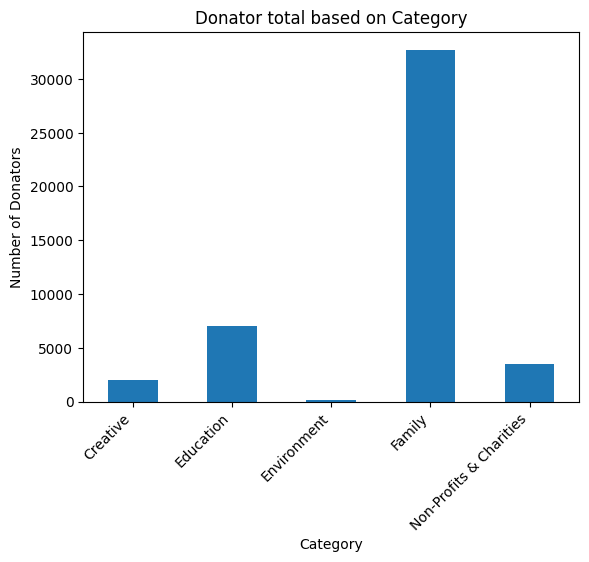

In [89]:
donator_count_by_cat.plot(kind='bar', title= 'Donator total based on Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Donators')

- How many campaigns by category are successful, with over 60% funding towards completion? Please note that this may not be answered completely now, since dates are important to track here. 

In [50]:
#create a df to extract rows that are above 60% success rate:

success_df = campaigns_df[campaigns_df['Percent funded (%)'] >= 60]
success_rate_by_cat = success_df.groupby('Category')['Percent funded (%)'].count()
success_rate_by_cat


Category
Creative                   23
Education                  36
Family                     59
Non-Profits & Charities     7
Name: Percent funded (%), dtype: int64

- Whats are the top 30 largest percentages of success for a campaign, despite the category? Search for outlier cases that go above 100%. This implies these campaigns are overfunded past their original funding goal.

In [54]:
success_df['Percent funded (%)'].nlargest(30)

293    814.200000
348    311.250000
116    300.400000
7      240.800000
280    200.800000
9      174.916667
36     152.360000
402    127.000000
322    126.560000
236    126.000000
54     123.500000
232    115.500000
327    114.750000
409    112.900000
129    112.220000
201    111.560000
115    111.166667
385    110.912500
126    110.743333
71     109.955752
163    109.166667
400    108.450000
72     105.866667
18     104.203333
112    103.333333
178    101.942646
404    101.250000
408    101.200000
305    100.800000
65     100.300000
Name: Percent funded (%), dtype: float64

- Which categories do these outliers belong to?

In [68]:
success_df.nlargest(30, 'Percent funded (%)')['Category'].value_counts()

Category
Family                     15
Education                   9
Creative                    5
Non-Profits & Charities     1
Name: count, dtype: int64

<Axes: title={'center': 'Percentage of Success outlier rate by Category'}, ylabel='count'>

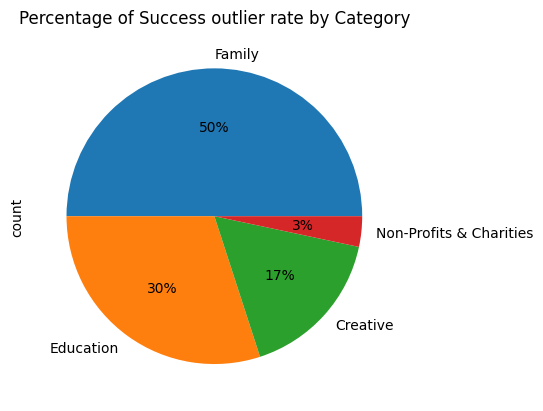

In [74]:
success_df.nlargest(30, 'Percent funded (%)')['Category'].value_counts().plot(kind='pie',autopct='%1.0f%%', title = 'Percentage of Success outlier rate by Category')

- What is the correlation between the number of Donators and the success of a campaign?

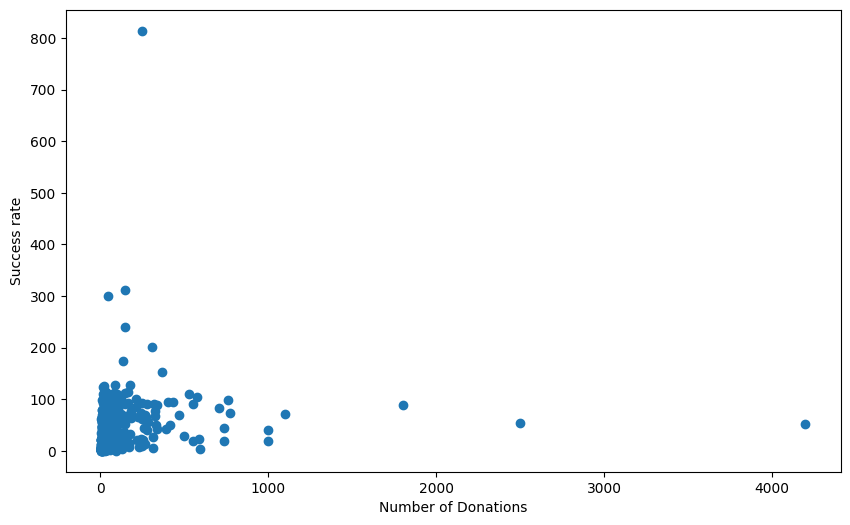

In [103]:
#To answer this question, illustrate with a scatterplot:

plt.figure(figsize=(10,6))
plt.scatter(x=campaigns_df['Donations'], y=campaigns_df['Percent funded (%)'])
plt.xlabel('Number of Donations')
plt.ylabel('Success rate')


plt.show()


 Key observation: The number of donors does not correlate with the success rate. This is because donors may donate a specific amount to their choosing. A single donator can donate more than 100 dollars compared to 10 donors who may pitch up to 50 dollars or less. 

In [104]:
#To double check, use calculate the correlation coefficient: 
correlation = campaigns_df['Donations'].corr(campaigns_df['Percent funded (%)'])
print(correlation)

0.12886906996356642


Result being near 0 implies no correlation, confirmed.